In [0]:
# 30个6786并列输入， 输出为3个百分比 （黑白灰）。   数据为  54个train   18个 test

In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt 
from keras.models import Model
from keras.layers import Input
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers.merge import concatenate 
from keras.layers import Flatten 
from google.colab import drive
drive.mount('/content/drive') 

Using TensorFlow backend.


Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
# load1 = np.load('/content/1.npy')
# load2 = np.load('/content/M2.npy')
load1 = np.load('/content/drive/My Drive/input/pre/10.npy')
load2 = np.load('/content/drive/My Drive/output/M2.npy')
load3 = np.load('/content/drive/My Drive/input/post/10.npy')
load4 = np.load('/content/drive/My Drive/input/fu/10.npy')
load5 = np.load('/content/drive/My Drive/output/M3.npy')
load6 = np.load('/content/drive/My Drive/output/M4.npy')
# load4 = np.load('/content/1.npy')
# load5 = np.load('/content/1.npy')
# load6 = np.load('/content/1.npy')
# load7 = np.load('/content/1.npy')
# load8 = np.load('/content/1.npy')
# load9 = np.load('/content/1.npy')
# load10 = np.load('/content/1.npy')

In [0]:
# 1-3 delta 8-10 lowalfa 10-12highalfa 4-7 ceta 13-21beta1 22-30beta2 

In [0]:
def extract_half_of_matrix1(patient):
    Herz=[]
    half_matrix = []
    for i in range (30):
        for j in range(116):
            for k in range(j,116):
                half_matrix.append(load1[patient,i,j,k])
        Herz.append(half_matrix)
        half_matrix = []
    
    Herz = np.array(Herz)
#     print(Herz.shape)
    return Herz 



def extract_half_of_matrix3(patient):
    Herz=[]
    half_matrix = []
    for i in range (30):
        for j in range(116):
            for k in range(j,116):
                half_matrix.append(load3[patient,i,j,k])
        Herz.append(half_matrix)
        half_matrix = []
    
    Herz = np.array(Herz)
#     print(Herz.shape)
    return Herz


def extract_half_of_matrix4(patient):
    Herz=[]
    half_matrix = []
    for i in range (30):
        for j in range(116):
            for k in range(j,116):
                half_matrix.append(load4[patient,i,j,k])
        Herz.append(half_matrix)
        half_matrix = []
    
    Herz = np.array(Herz)
#     print(Herz.shape)
    return Herz 

In [5]:
New = []
for i in range(24):
    New.append(extract_half_of_matrix1(i))
Load1 = np.array(New)

New3 = []
for i in range(24):
    New3.append(extract_half_of_matrix3(i))
Load3 = np.array(New3)

New4 = []
for i in range(24):
    New4.append(extract_half_of_matrix4(i))
Load4 = np.array(New4)

print(Load1.shape)
print(Load3.shape)
print(Load4.shape)

(24, 30, 6786)
(24, 30, 6786)
(24, 30, 6786)


In [6]:
split = 18
train_data1 = Load1[:split,:,:]   # 18 patients as training
test_data1 = Load1[split:,:,:]   # 6 as testing
train_data3 = Load3[:split,:,:]   
test_data3 = Load3[split:,:,:]
train_data4 = Load4[:split,:,:]   
test_data4 = Load4[split:,:,:]
# train_data = train_data1 +  train_data3 + train_data4
train_data = np.concatenate((train_data1, train_data3,train_data4), axis=0)  # concatenate all the training instances into one array 
test_data = np.concatenate((test_data1,test_data3,test_data4), axis= 0)
print(train_data.shape)
print(test_data.shape)

(54, 30, 6786)
(18, 30, 6786)


In [0]:
print(train_data[0,0,:100])
print(load2[0,0,:21])

[0.         0.0814181  0.03443036 0.04894651 0.04941659 0.02900273
 0.0397815  0.08847562 0.05800408 0.02393514 0.05573988 0.09752181
 0.0578258  0.07302182 0.04767879 0.03074588 0.04714932 0.0677349
 0.03754459 0.04539132 0.01822955 0.01821937 0.03990576 0.03848725
 0.05455573 0.03409113 0.03862668 0.02837135 0.0458734  0.05681305
 0.0384318  0.02985572 0.03636883 0.03559513 0.04151902 0.04595902
 0.0302063  0.08444113 0.02561871 0.07355041 0.02356411 0.05406451
 0.04480598 0.07381176 0.06673404 0.0749597  0.02541175 0.0613864
 0.05936792 0.08048913 0.04153519 0.07906324 0.02660977 0.07623912
 0.02863925 0.08700988 0.04013265 0.05980596 0.05717768 0.06358277
 0.04304999 0.06037157 0.03898775 0.06013465 0.03842225 0.07433287
 0.05328908 0.04443625 0.05364933 0.05599272 0.02896916 0.0306246
 0.03751065 0.04530431 0.03345425 0.04287243 0.03243301 0.05290792
 0.04354517 0.04613575 0.04247796 0.05618811 0.03994086 0.05721972
 0.03962936 0.07092616 0.03822257 0.07339494 0.03534748 0.0837099

In [7]:
C2_percent = []
for i in range (24):
  c1 = 0 #blind
  c2 = 0 #partial
  c3 = 0 #normal
  for j in range (21):
    for k in range (21):
      if '0' < load2[i,j,k] and load2[i,j,k] < '32':
        c2+=1
      if  load2[i,j,k] == '32':
        c3+=1
      if  load2[i,j,k] == '0':
        c1+=1
  C2_percent.append([c1/441,c2/441,c3/441])
C2_percent = np.array(C2_percent)
# print(C2_percent) 

           
C5_percent = []
for i in range (24):
  c1 = 0 #blind
  c2 = 0 #partial
  c3 = 0 #normal
  for j in range (21):
    for k in range (21):
      if '0' < load5[i,j,k] and load5[i,j,k] < '32':
        c2+=1
      if  load5[i,j,k] == '32':
        c3+=1
      if  load5[i,j,k] == '0':
        c1+=1
  C5_percent.append([c1/441,c2/441,c3/441])
C5_percent = np.array(C5_percent)
# print(C5_percent) 


C6_percent = []
for i in range (24):
  c1 = 0 #blind
  c2 = 0 #partial
  c3 = 0 #normal
  for j in range (21):
    for k in range (21):
      if '0' < load6[i,j,k] and load6[i,j,k] < '32':
        c2+=1
      if  load6[i,j,k] == '32':
        c3+=1
      if  load6[i,j,k] == '0':
        c1+=1
  C6_percent.append([c1/441,c2/441,c3/441])
C6_percent = np.array(C6_percent)
# print(C6_percent) 

train_label = C2_percent[:split,:]
test_label= C2_percent[split:,:]
train_label5 = C5_percent[:split,:]
test_label5= C5_percent[split:,:]
train_label6 = C6_percent[:split,:]
test_label6= C6_percent[split:,:]
train_label = np.concatenate((train_label, train_label5,train_label6), axis=0)
test_label = np.concatenate((test_label,test_label5,test_label6), axis=0)  

# train_label=np.reshape(train_label, (54, 21*21))
# test_label=np.reshape(test_label, (18, 21*21))
print(train_label.shape)
print(train_data.shape)
print(test_label.shape)

(54, 3)
(54, 30, 6786)
(18, 3)


In [0]:
train_data1=train_data[:,0,:]
train_data2=train_data[:,1,:]
train_data3=train_data[:,2,:]
train_data4=train_data[:,3,:]
train_data5=train_data[:,4,:]
train_data6=train_data[:,5,:]
train_data7=train_data[:,6,:]
train_data8=train_data[:,7,:]
train_data9=train_data[:,8,:]
train_data10=train_data[:,9,:]
train_data11=train_data[:,10,:]
train_data12=train_data[:,11,:]
train_data13=train_data[:,12,:]
train_data14=train_data[:,13,:]
train_data15=train_data[:,14,:]
train_data16=train_data[:,15,:]
train_data17=train_data[:,16,:]
train_data18=train_data[:,17,:]
train_data19=train_data[:,18,:]
train_data20=train_data[:,19,:]
train_data21=train_data[:,20,:]
train_data22=train_data[:,21,:]
train_data23=train_data[:,22,:]
train_data24=train_data[:,23,:]
train_data25=train_data[:,24,:]
train_data26=train_data[:,25,:]
train_data27=train_data[:,26,:]
train_data28=train_data[:,27,:]
train_data29=train_data[:,28,:]
train_data30=train_data[:,29,:]

test_data1=test_data[0,0,:].reshape(1,6786)
test_data2=test_data[0,1,:].reshape(1,6786)
test_data3=test_data[0,2,:].reshape(1,6786)
test_data4=test_data[0,3,:].reshape(1,6786)
test_data5=test_data[0,4,:].reshape(1,6786)
test_data6=test_data[0,5,:].reshape(1,6786)
test_data7=test_data[0,6,:].reshape(1,6786)
test_data8=test_data[0,7,:].reshape(1,6786)
test_data9=test_data[0,8,:].reshape(1,6786)
test_data10=test_data[0,9,:].reshape(1,6786)
test_data11=test_data[0,10,:].reshape(1,6786)
test_data12=test_data[0,11,:].reshape(1,6786)
test_data13=test_data[0,12,:].reshape(1,6786)
test_data14=test_data[0,13,:].reshape(1,6786)
test_data15=test_data[0,14,:].reshape(1,6786)
test_data16=test_data[0,15,:].reshape(1,6786)
test_data17=test_data[0,16,:].reshape(1,6786)
test_data18=test_data[0,17,:].reshape(1,6786)
test_data19=test_data[0,18,:].reshape(1,6786)
test_data20=test_data[0,19,:].reshape(1,6786)
test_data21=test_data[0,20,:].reshape(1,6786)
test_data22=test_data[0,21,:].reshape(1,6786)
test_data23=test_data[0,22,:].reshape(1,6786)
test_data24=test_data[0,23,:].reshape(1,6786)
test_data25=test_data[0,24,:].reshape(1,6786)
test_data26=test_data[0,25,:].reshape(1,6786)
test_data27=test_data[0,26,:].reshape(1,6786)
test_data28=test_data[0,27,:].reshape(1,6786)
test_data29=test_data[0,28,:].reshape(1,6786)
test_data30=test_data[0,29,:].reshape(1,6786)

Test_data1=test_data[:,0,:]
Test_data2=test_data[:,1,:]
Test_data3=test_data[:,2,:]
Test_data4=test_data[:,3,:]
Test_data5=test_data[:,4,:]
Test_data6=test_data[:,5,:]
Test_data7=test_data[:,6,:]
Test_data8=test_data[:,7,:]
Test_data9=test_data[:,8,:]
Test_data10=test_data[:,9,:]
Test_data11=test_data[:,10,:]
Test_data12=test_data[:,11,:]
Test_data13=test_data[:,12,:]
Test_data14=test_data[:,13,:]
Test_data15=test_data[:,14,:]
Test_data16=test_data[:,15,:]
Test_data17=test_data[:,16,:]
Test_data18=test_data[:,17,:]
Test_data19=test_data[:,18,:]
Test_data20=test_data[:,19,:]
Test_data21=test_data[:,20,:]
Test_data22=test_data[:,21,:]
Test_data23=test_data[:,22,:]
Test_data24=test_data[:,23,:]
Test_data25=test_data[:,24,:]
Test_data26=test_data[:,25,:]
Test_data27=test_data[:,26,:]
Test_data28=test_data[:,27,:]
Test_data29=test_data[:,28,:]
Test_data30=test_data[:,29,:]


# # test_data1=test_data[0,0,: ]
# # test_data2=test_data[0,1,: ]
# # test_data3=test_data[0,2,: ]
# # test_data4=test_data[0,3,: ]
# # test_data5=test_data[0,4,: ]
# # test_data6=test_data[0,5,: ]
# # test_data7=test_data[0,6,: ]
# # test_data8=test_data[0,7,: ]
# # test_data9=test_data[0,8,: ]
# # test_data10=test_data[0,9,: ]
# # test_data11=test_data[0,10,: ]
# # test_data12=test_data[0,11,: ]
# # test_data13=test_data[0,12,: ]
# # test_data14=test_data[0,13,: ]
# # test_data15=test_data[0,14,: ]
# # test_data16=test_data[0,15,: ]
# # test_data17=test_data[0,16,: ]
# # test_data18=test_data[0,17,: ]
# # test_data19=test_data[0,18,: ]
# # test_data20=test_data[0,19,: ]
# # test_data21=test_data[0,20,: ]
# # test_data22=test_data[0,21,: ]
# # test_data23=test_data[0,22,: ]
# # test_data24=test_data[0,23,: ]
# # test_data25=test_data[0,24,: ]
# # test_data26=test_data[0,25,: ]
# # test_data27=test_data[0,26,: ]
# # test_data28=test_data[0,27,: ]
# # test_data29=test_data[0,28,: ]
# # test_data30=test_data[0,29,: ]




In [9]:
# 第一个unit
IN1 = Input(shape=(6786,))
t1 = Dense(1500,activation = 'relu')(IN1)

# 第个unit
IN2 = Input(shape=(6786,))
t2 = Dense(1500,activation = 'relu')(IN2)


# 第个unit
IN3 = Input(shape=(6786,))
t3 = Dense(1500,activation = 'relu')(IN3)


# 第个unit
IN4 = Input(shape=(6786,))
t4 = Dense(1500,activation = 'relu')(IN4)

# 第个unit
IN5 = Input(shape=(6786,))
t5 = Dense(1500,activation = 'relu')(IN5)


# 第个unit
IN6 = Input(shape=(6786,))
t6 = Dense(1500,activation = 'relu')(IN6)


# 第个unit
IN7 = Input(shape=(6786,))
t7 = Dense(1500,activation = 'relu')(IN7)


# 第个unit
IN8 = Input(shape=(6786,))
t8 = Dense(1500,activation = 'relu')(IN8)


# 第个unit
IN9 = Input(shape=(6786,))
t9 = Dense(1500,activation = 'relu')(IN9)


# 第个unit
IN10 = Input(shape=(6786,))
t10 = Dense(1500,activation = 'relu')(IN10)


# 第个unit
IN11 = Input(shape=(6786,))
t11 = Dense(1500,activation = 'relu')(IN11)


# 第个unit
IN12 = Input(shape=(6786,))
t12 = Dense(1500,activation = 'relu')(IN12)


# 第个unit
IN13 = Input(shape=(6786,))
t13 = Dense(1500,activation = 'relu')(IN13)


# 第个unit
IN14 = Input(shape=(6786,))
t14 = Dense(1500,activation = 'relu')(IN14)


# 第个unit
IN15 = Input(shape=(6786,))
t15 = Dense(1500,activation = 'relu')(IN15)


# 第个unit
IN16 = Input(shape=(6786,))
t16 = Dense(1500,activation = 'relu')(IN16)


# 第个unit
IN17 = Input(shape=(6786,))
t17 = Dense(1500,activation = 'relu')(IN17)


# 第个unit
IN18 = Input(shape=(6786,))
t18 = Dense(1500,activation = 'relu')(IN18)


# 第个unit
IN19 = Input(shape=(6786,))
t19 = Dense(1500,activation = 'relu')(IN19)


# 第个unit
IN20 = Input(shape=(6786,))
t20 = Dense(1500,activation = 'relu')(IN20)


# 第个unit
IN21 = Input(shape=(6786,))
t21 = Dense(1500,activation = 'relu')(IN21)


# 第个unit
IN22 = Input(shape=(6786,))
t22 = Dense(1500,activation = 'relu')(IN22)


# 第个unit
IN23 = Input(shape=(6786,))
t23 = Dense(1500,activation = 'relu')(IN23)


# 第个unit
IN24 = Input(shape=(6786,))
t24 = Dense(1500,activation = 'relu')(IN24)


# 第个unit
IN25 = Input(shape=(6786,))
t25 = Dense(1500,activation = 'relu')(IN25)


# 第个unit
IN26 = Input(shape=(6786,))
t26 = Dense(1500,activation = 'relu')(IN26)


# 第个unit
IN27 = Input(shape=(6786,))
t27 = Dense(1500,activation = 'relu')(IN27)


# 第个unit
IN28 = Input(shape=(6786,))
t28 = Dense(1500,activation = 'relu')(IN28)


# 第个unit
IN29 = Input(shape=(6786,))
t29 = Dense(1500,activation = 'relu')(IN29)


# 第个unit
IN30 = Input(shape=(6786,))
t30 = Dense(1500,activation = 'relu')(IN30)



In [12]:
merge = concatenate([t1,t2,t3,t4,t5,t6,t7,t8,t9,t10,t11,t12,t13,t14,t15,t16,t17,t18,t19,t20,t21,t22,t23,t24,t25,t26,t27,t28,t29,t30])
# merge =  Flatten()(merge)
# M1 = Dense(6786,activation = 'relu')(merge)
# M2 = Dense(3393,activation = 'relu')(M1)
M3 = Dense(700,activation = 'relu')(merge)
M4 = Dense(350,activation = 'relu')(M3)
M5 = Dense(175,activation = 'relu')(M4)
M6 = Dense(80,activation = 'relu')(M5)
M7 = Dense(40,activation = 'relu')(M6)
M8 = Dense(20,activation = 'relu')(M7)
M9 = Dense(10,activation = 'relu')(M8)
M10 = Dense(6,activation = 'relu')(M9)

M11 = Dense(3,activation = 'softmax')(M10)
# M11 = Dense(3)(M10)

model = Model(inputs=[IN1,IN2,IN3,IN4,IN5,IN6,IN7,IN8,IN9,IN10,IN11,IN12,IN13,IN14,IN15,IN16,IN17,IN18,IN19,IN20,IN21,IN22,IN23,IN24,IN25,IN26,IN27,IN28,IN29,IN30], outputs=M11)
from keras.optimizers import RMSprop,Adam
model.compile(optimizer = Adam(lr=0.00001),
              loss = 'mean_squared_error',
              metrics = ['mse'])
model.summary()

Model: "model_2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 6786)         0                                            
__________________________________________________________________________________________________
input_2 (InputLayer)            (None, 6786)         0                                            
__________________________________________________________________________________________________
input_3 (InputLayer)            (None, 6786)         0                                            
__________________________________________________________________________________________________
input_4 (InputLayer)            (None, 6786)         0                                            
____________________________________________________________________________________________

In [13]:
history = model.fit([train_data1,train_data2,train_data3,train_data4,train_data5,train_data6,train_data7,train_data8,train_data9,train_data10,train_data11,train_data12,train_data13,train_data14,train_data15,train_data16,train_data17,train_data18,train_data19,train_data20,train_data21,train_data22,train_data23,train_data24,train_data25,train_data26,train_data27,train_data28,train_data29,train_data30], train_label, epochs=100)

Epoch 1/100
54/54 [==============================] - 6s 107ms/step - loss: 0.0431 - mean_squared_error: 0.0431
Epoch 2/100
54/54 [==============================] - 0s 6ms/step - loss: 0.0381 - mean_squared_error: 0.0381
Epoch 3/100
54/54 [==============================] - 0s 6ms/step - loss: 0.0329 - mean_squared_error: 0.0329
Epoch 4/100
54/54 [==============================] - 0s 6ms/step - loss: 0.0282 - mean_squared_error: 0.0282
Epoch 5/100
54/54 [==============================] - 0s 5ms/step - loss: 0.0241 - mean_squared_error: 0.0241
Epoch 6/100
54/54 [==============================] - 0s 6ms/step - loss: 0.0208 - mean_squared_error: 0.0208
Epoch 7/100
54/54 [==============================] - 0s 6ms/step - loss: 0.0184 - mean_squared_error: 0.0184
Epoch 8/100
54/54 [==============================] - 0s 6ms/step - loss: 0.0166 - mean_squared_error: 0.0166
Epoch 9/100
54/54 [==============================] - 0s 6ms/step - loss: 0.0150 - mean_squared_error: 0.0150
Epoch 10/100
54/5

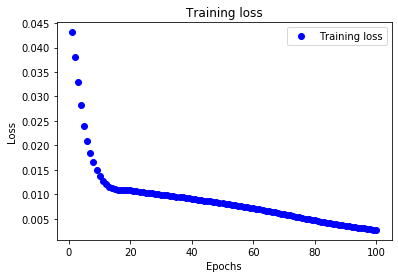

In [14]:
loss = history.history['loss']
# val_loss = history.history['val_loss']
# acc = history.history['acc']
# val_acc=history.history['val_acc']
epochs = range(1,len(loss) +1)
plt.plot(epochs, loss, 'bo', label='Training loss')
# plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [15]:
#  model.predict(x = [test_data1,test_data2,test_data3,test_data4,test_data5,test_data6,test_data7,test_data8,test_data9,test_data10,test_data11,test_data12,test_data13,test_data14,test_data15,test_data16,test_data17,test_data18,test_data19,test_data20,test_data21,test_data22,test_data23,test_data24,test_data25,test_data26,test_data27,test_data28,test_data29,test_data30])
newx = [test_data1,test_data2,test_data3,test_data4,test_data5,test_data6,test_data7,test_data8,test_data9,test_data10,test_data11,test_data12,test_data13,test_data14,test_data15,test_data16,test_data17,test_data18,test_data19,test_data20,test_data21,test_data22,test_data23,test_data24,test_data25,test_data26,test_data27,test_data28,test_data29,test_data30]


model.predict(newx)  #只取一个data做test 


array([[0.31277022, 0.07166277, 0.615567  ]], dtype=float32)

In [16]:
print(test_label[0])


[0.38548753 0.03628118 0.57823129]


In [17]:
TEST = [Test_data1,Test_data2,Test_data3,Test_data4,Test_data5,Test_data6,Test_data7,Test_data8,Test_data9,Test_data10,Test_data11,Test_data12,Test_data13,Test_data14,Test_data15,Test_data16,Test_data17,Test_data18,Test_data19,Test_data20,Test_data21,Test_data22,Test_data23,Test_data24,Test_data25,Test_data26,Test_data27,Test_data28,Test_data29,Test_data30]


History = model.evaluate(x=TEST, y =test_label)  #用18组test data  
print(History)


18/18 [==============================] - 0s 20ms/step
[0.018952317535877228, 0.018952317535877228]
